In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# Read Data

df = pd.read_csv("UWYieldDataNDVI.csv")
df['Moisture Content, w.b. %'] = df['Moisture Content, w.b. %'].str.rstrip('%').astype('float')
df = df.drop(df[df['Mean_NDVI']==0].index).drop(df[df['Yield, kg DM/ha']>=6500].index)
df = df.rename(columns={"Crop Height, m": "Height", "Moisture Content, w.b. %": "Moisture", "Yield, kg DM/ha":"Yield"})
df

,Date,GCP,Northing,Easting,Elevation,Latitude DD.DD,Longitude DD.DD,Height,Yield,Moisture,Mean_NDVI,SD_NDVI
0,5/28/2019,T1,3077.3726,3061.3572,33.7142,43.3149,-89.3330,0.48,3930,84.4,0.280772,0.045344
1,5/28/2019,T2,3137.4370,3060.6171,32.8211,43.3155,-89.3330,0.47,3088,85.4,0.280200,0.064424
2,5/28/2019,T3,3078.2725,2982.3921,34.7905,43.3150,-89.3340,0.42,3578,82.6,0.276925,0.059429
3,5/28/2019,T4,3137.5043,2986.0653,33.2757,43.3155,-89.3339,0.41,3972,86.7,0.300764,0.056162
4,5/28/2019,T5,3106.5656,3029.7739,33.4311,43.3152,-89.3334,0.46,3494,85.6,0.266040,0.045340
...,...,...,...,...,...,...,...,...,...,...,...,...
58,8/7/2019,T12,3152.4273,2972.1047,33.2224,43.3156,-89.3341,0.38,2531,86.5,0.335956,0.067358
59,8/7/2019,T13,3172.1663,3018.7459,32.8016,43.3158,-89.3335,0.53,4365,83.2,0.369593,0.087340
60,8/7/2019,T14,3202.7423,3065.9985,33.4185,43.3161,-89.3329,0.51,4196,82.7,0.292063,0.088576
61,8/7/2019,T15,3149.1993,3066.7250,32.7947,43.3156,-89.3329,0.37,3009,82.9,0.354037,0.076376


In [3]:
df = df.drop(df.loc[df["Date"]=="6/3/2019"].loc[df["GCP"]=="T1"].index)
df = df.drop(df.loc[df["Date"]=="5/28/2019"].loc[df["GCP"]=="T1"].index)
df = df.drop(df.loc[df["Date"]=="5/28/2019"].loc[df["GCP"]=="T3"].index)
df = df.drop(df.loc[df["Date"]=="5/28/2019"].loc[df["GCP"]=="T5"].index)
df = df.drop(df.loc[df["Date"]=="6/3/2019"].loc[df["GCP"]=="T5"].index)
df = df.drop(df.loc[df["Date"]=="5/28/2019"].loc[df["GCP"]=="T10"].index)
df = df.drop(df.loc[df["Date"]=="8/7/2019"].loc[df["GCP"]=="T10"].index)
df = df.drop(df.loc[df["Date"]=="7/8/2019"].loc[df["GCP"]=="T12"].index)
df = df.drop(df.loc[df["Date"]=="5/28/2019"].loc[df["GCP"]=="T12"].index)
df = df.drop(df.loc[df["Date"]=="8/7/2019"].loc[df["GCP"]=="T12"].index)
df = df.drop(df.loc[df["Date"]=="6/3/2019"].loc[df["GCP"]=="T13"].index)
df = df.drop(df.loc[df["Date"]=="5/28/2019"].loc[df["GCP"]=="T14"].index)

In [6]:
df["CV_NDVI"]=df["SD_NDVI"]/df["Mean_NDVI"]

Plotting the data

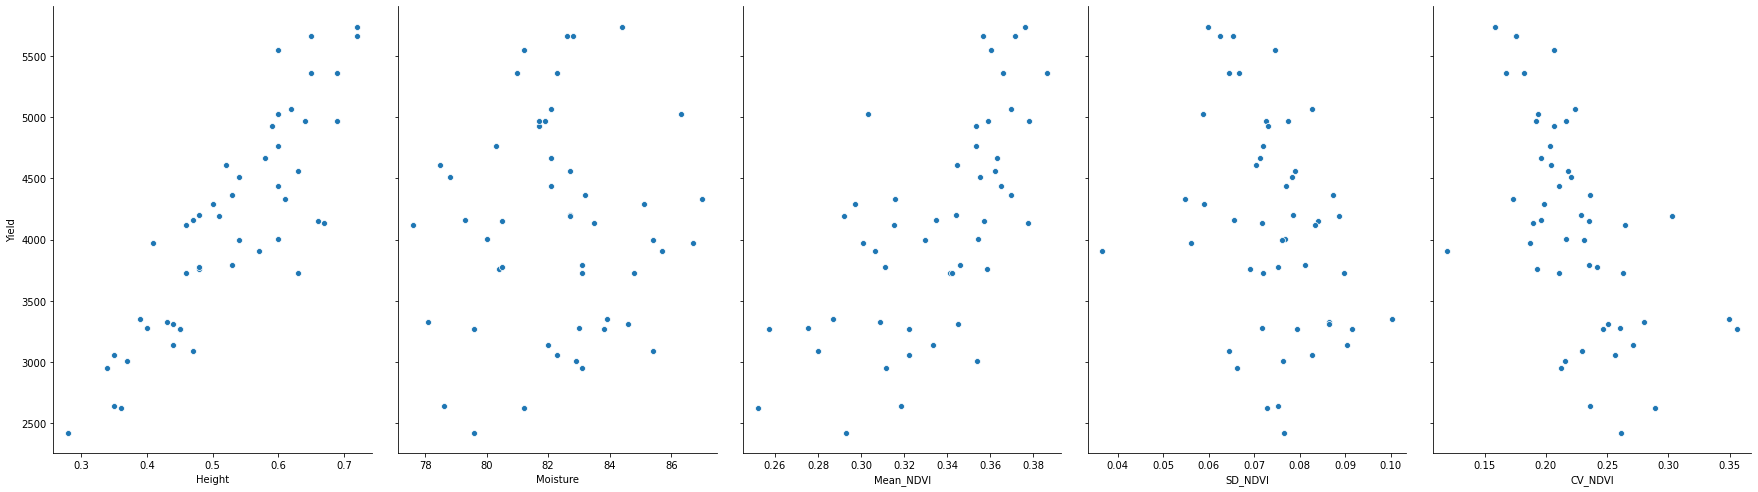

In [7]:
var_interest = ['Height','Moisture','Mean_NDVI','SD_NDVI',"CV_NDVI"]
sns.pairplot(df, x_vars= var_interest, y_vars='Yield', height=7, aspect=0.7)

Plotting the data containing the 95% CI

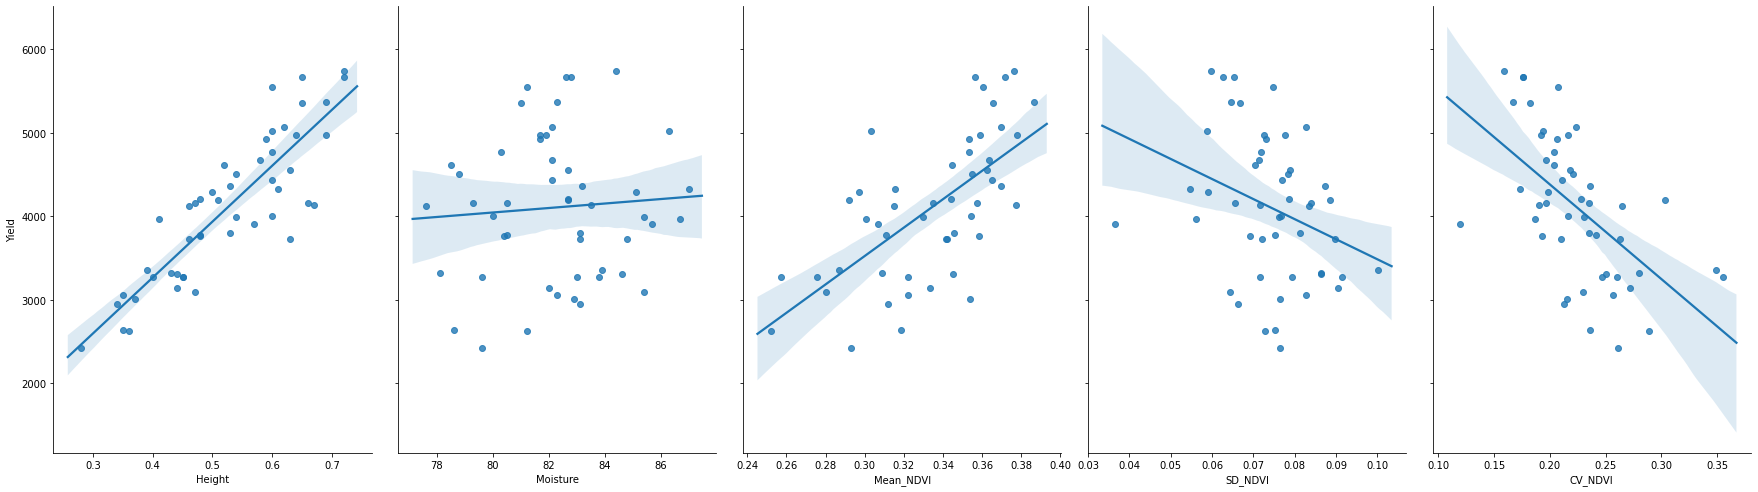

In [8]:
sns.pairplot(df, x_vars=var_interest, y_vars='Yield', height=7, aspect=0.7, kind='reg')

# Linear Model 1 (Mean NDVI + SD NDVI ~ Yield)
Creating linear regression with Mean and SD from NDVI

In [9]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Yield ~ Mean_NDVI + SD_NDVI', data=df).fit()

# print the coefficients
lm1.params

Intercept      170.662548
Mean_NDVI    16768.072528
SD_NDVI     -22517.433705
dtype: float64

In [10]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     24.60
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           5.42e-08
Time:                        09:21:55   Log-Likelihood:                -382.43
No. Observations:                  49   AIC:                             770.9
Df Residuals:                      46   BIC:                             776.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.6625   1079.995      0.158      0.875   -2003.254    2344.579
Mean_NDVI   1.677e+04   2659.422      6.305      0.000    1.14e+04    2.21e+04
SD_NDVI    -2.252e+04   7826.821     -2.877      0.006   -3.83e+04   -6762.859
==============================================================================
Omnibus:                        0.551   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.685
Skew:                          -0.155   Prob(JB):                        0.710
Kurtosis:                       2.511   Cond. No.                         94.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Model 2 (Height ~ Yield)

Creating model with only Height to predict Yield

In [11]:
# create a fitted model
lm2 = smf.ols(formula='Yield ~ Height', data=df).fit()

# print the coefficients
lm2.params

Intercept     587.108864
Height       6696.336531
dtype: float64

In [12]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     144.1
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           6.43e-16
Time:                        09:21:57   Log-Likelihood:                -365.89
No. Observations:                  49   AIC:                             735.8
Df Residuals:                      47   BIC:                             739.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    587.1089    299.607      1.960      0.056     -15.623    1189.840
Height      6696.3365    557.884     12.003      0.000    5574.019    7818.654
==============================================================================
Omnibus:                        1.468   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.480   Jarque-Bera (JB):                1.113
Skew:                          -0.369   Prob(JB):                        0.573
Kurtosis:                       2.970   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Model 3 (Height + Mean_NDVI + SD_NDVI ~ Yield)

Creating model with only Height to predict Yield

In [13]:
# create a fitted model
lm3 = smf.ols(formula='Yield ~ Height + Mean_NDVI + SD_NDVI', data=df).fit()

# print the coefficients
lm3.params

Intercept     333.070456
Height       5720.041389
Mean_NDVI    3800.407463
SD_NDVI     -6787.941475
dtype: float64

In [14]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     49.71
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           2.49e-14
Time:                        09:21:58   Log-Likelihood:                -364.44
No. Observations:                  49   AIC:                             736.9
Df Residuals:                      45   BIC:                             744.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    333.0705    756.707      0.440      0.662   -1191.017    1857.157
Height      5720.0414    818.908      6.985      0.000    4070.677    7369.406
Mean_NDVI   3800.4075   2629.718      1.445      0.155   -1496.117    9096.932
SD_NDVI    -6787.9415   5925.890     -1.145      0.258   -1.87e+04    5147.413
==============================================================================
Omnibus:                        1.336   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                1.044
Skew:                          -0.356   Prob(JB):                        0.593
Kurtosis:                       2.933   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Model 4 (Height + Mean_NDVI~ Yield)

In [15]:
# create a fitted model
lm4 = smf.ols(formula='Yield ~ Height + Mean_NDVI', data=df).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     73.41
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           4.85e-15
Time:                        09:22:00   Log-Likelihood:                -365.14
No. Observations:                  49   AIC:                             736.3
Df Residuals:                      46   BIC:                             742.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -107.7975    653.724     -0.165      0.870   -1423.675    1208.080
Height      6076.5060    760.040      7.995      0.000    4546.625    7606.387
Mean_NDVI   3053.6267   2556.252      1.195      0.238   -2091.843    8199.096
==============================================================================
Omnibus:                        1.169   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.804
Skew:                          -0.314   Prob(JB):                        0.669
Kurtosis:                       3.012   Cond. No.                         51.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Model 5 (Height + SD_NDVI ~ Yield)

In [16]:
# create a fitted model
lm5 = smf.ols(formula='Yield ~ Height + SD_NDVI', data=df).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     71.82
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           7.10e-15
Time:                        09:22:06   Log-Likelihood:                -365.55
No. Observations:                  49   AIC:                             737.1
Df Residuals:                      46   BIC:                             742.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1006.8718    603.018      1.670      0.102    -206.941    2220.685
Height      6555.5372    586.804     11.172      0.000    5374.362    7736.712
SD_NDVI    -4664.8245   5808.426     -0.803      0.426   -1.64e+04    7026.930
==============================================================================
Omnibus:                        1.859   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.395   Jarque-Bera (JB):                1.455
Skew:                          -0.422   Prob(JB):                        0.483
Kurtosis:                       2.973   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Model 6 (Coefficient of Variation ~ Yield)

In [17]:
# create a fitted model
lm6 = smf.ols(formula='Yield ~ CV_NDVI', data=df).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     24.34
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           1.05e-05
Time:                        09:23:20   Log-Likelihood:                -390.03
No. Observations:                  49   AIC:                             784.1
Df Residuals:                      47   BIC:                             787.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6644.4311    524.305     12.673      0.000    5589.665    7699.198
CV_NDVI    -1.132e+04   2294.242     -4.934      0.000   -1.59e+04   -6704.015
==============================================================================
Omnibus:                        2.952   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                1.964
Skew:                          -0.283   Prob(JB):                        0.375
Kurtosis:                       2.199   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Model 7 (Height + Coefficient of Variation ~ Yield)

In [18]:
# create a fitted model
lm6 = smf.ols(formula='Yield ~ Height + CV_NDVI', data=df).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     73.94
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           4.27e-15
Time:                        09:24:11   Log-Likelihood:                -365.01
No. Observations:                  49   AIC:                             736.0
Df Residuals:                      46   BIC:                             741.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1360.8782    665.382      2.045      0.047      21.533    2700.223
Height      6176.2868    683.198      9.040      0.000    4801.080    7551.494
CV_NDVI    -2231.8333   1716.786     -1.300      0.200   -5687.544    1223.877
==============================================================================
Omnibus:                        1.897   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                1.483
Skew:                          -0.426   Prob(JB):                        0.476
Kurtosis:                       2.978   Cond. No.                         35.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""